In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import seaborn as sns

In [2]:
df = pd.read_csv('Data/datasets_19_420_Iris.csv')

In [3]:
df = df.drop(['Id'],axis=1)

In [4]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# count number of each 
## my var

In [7]:
df.groupby('Species')['SepalLengthCm'].count()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: SepalLengthCm, dtype: int64

## right var

In [8]:
df["Species"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

# узнать средние значения по каждому из цветков
## my var

In [9]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
for item in range(1,4):
    print(df.columns[item])

SepalWidthCm
PetalLengthCm
PetalWidthCm


In [11]:
for item in range(0,4):
    print(df.columns[item])
    print(df.groupby('Species')[df.columns[item]].mean())
    print('-'*30)

SepalLengthCm
Species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: SepalLengthCm, dtype: float64
------------------------------
SepalWidthCm
Species
Iris-setosa        3.418
Iris-versicolor    2.770
Iris-virginica     2.974
Name: SepalWidthCm, dtype: float64
------------------------------
PetalLengthCm
Species
Iris-setosa        1.464
Iris-versicolor    4.260
Iris-virginica     5.552
Name: PetalLengthCm, dtype: float64
------------------------------
PetalWidthCm
Species
Iris-setosa        0.244
Iris-versicolor    1.326
Iris-virginica     2.026
Name: PetalWidthCm, dtype: float64
------------------------------


узнать средние значения по каждому из цветков через пандас

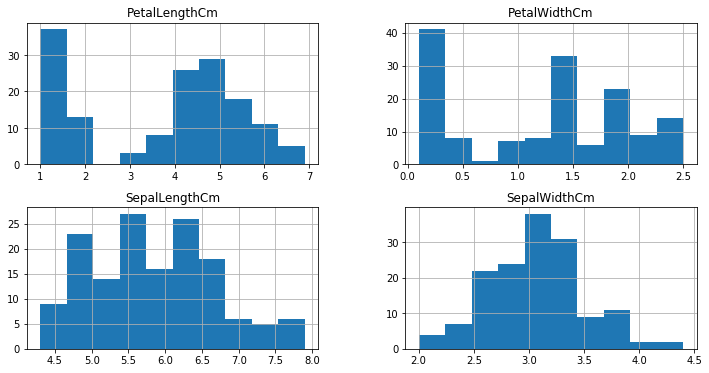

In [12]:
df.hist()
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

#### plot by pandas

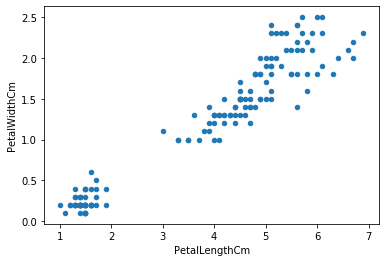

In [13]:
df.plot(x='PetalLengthCm', y='PetalWidthCm' , kind='scatter')

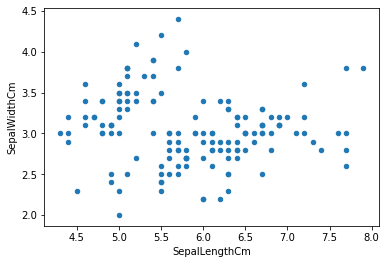

In [14]:
df.plot(x='SepalLengthCm', y='SepalWidthCm' , kind='scatter')

### the same by seaborn

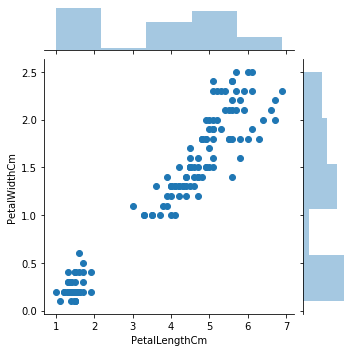

In [15]:
sns.jointplot(x='PetalLengthCm', y='PetalWidthCm', data=df, height=5)

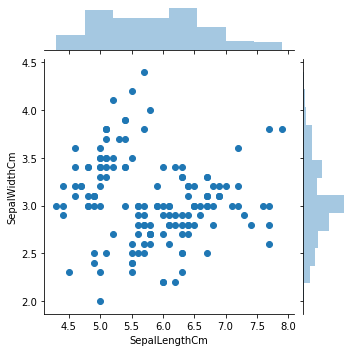

In [16]:
sns.jointplot(x='SepalLengthCm', y='SepalWidthCm', data=df, height=5)

### colored by seaborn plots

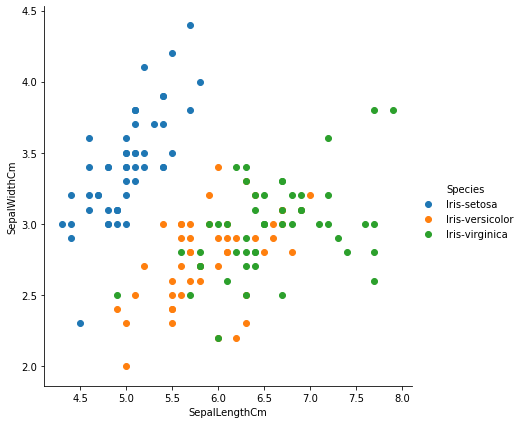

In [17]:
sns.FacetGrid(data=df, hue='Species', height=6) \
.map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()

### colored by pandas?

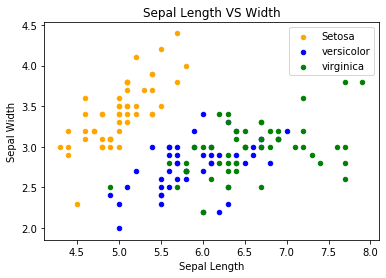

In [18]:
fig = df[df.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
df[df.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
df[df.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
plt.show()

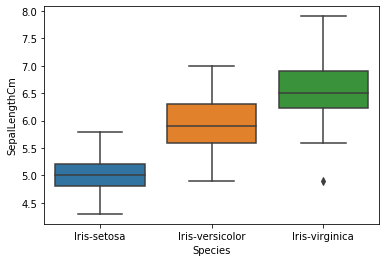

In [19]:
sns.boxplot(data=df, x="Species",y='SepalLengthCm')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018FF3910408>,
      dtype=object)

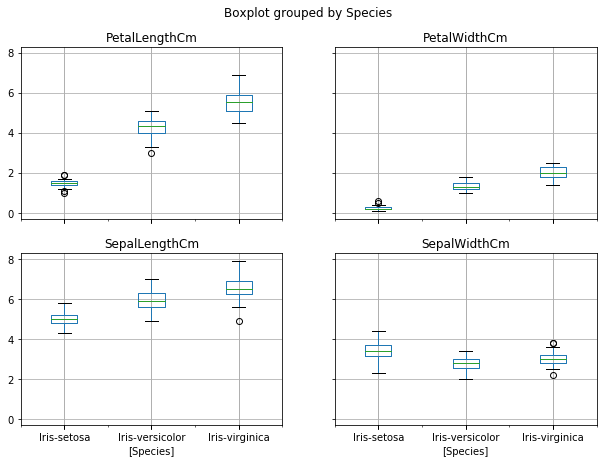

In [20]:
df.boxplot(by='Species', figsize=(10,7))

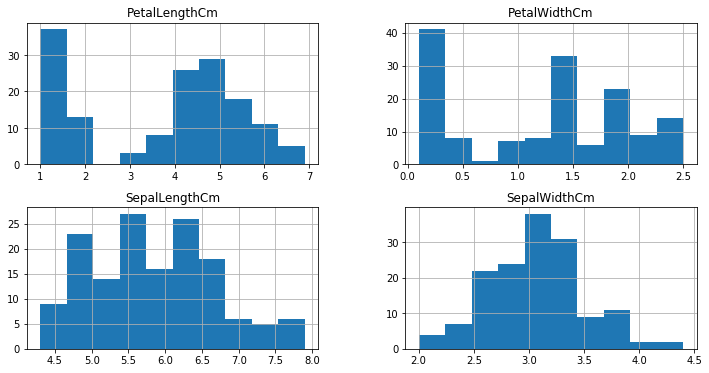

In [21]:
df.hist()
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

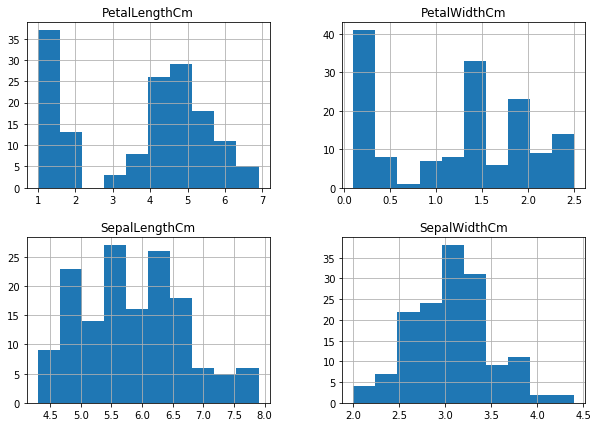

In [22]:
df.hist(figsize=(10,7))
plt.show()

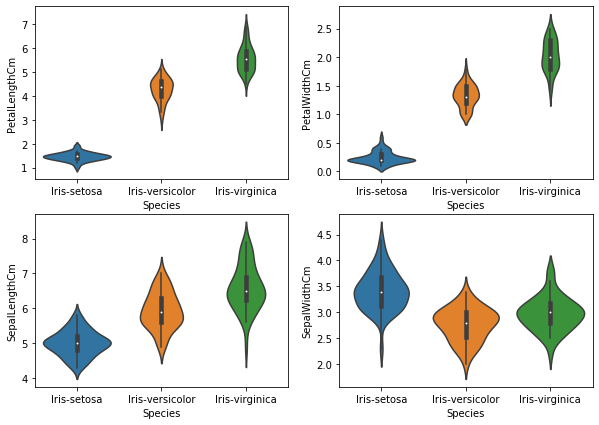

In [23]:
plt.figure(figsize=(10,7))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

# train - classification

#### preparation

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn import metrics
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop('Species', axis=1)
Y = df['Species']

X.shape, Y.shape

((150, 4), (150,))

In [26]:
x_train, y_train, x_test, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [27]:
### LogisticRegression
# 4. logreg = LogisticRegression()
# 5. logreg.fit(X, Y)
# 6. Y_pred = logreg.predict(X)
# 7. acc = logreg.score(X, Y)

logreg = LogisticRegression()
logreg.fit(X, Y)
Y_pred = logreg.predict(X)
acc_logreg = logreg.score(X, Y)
acc_logreg

0.9733333333333334

In [28]:
### NaiveBayes
# 8. naivebayes = GaussianNB()
# 9. naivebayes.fit(X, Y)
# 10. Y_pred = naivebayes.predict(X)
# 11. acc = naivebayes.score(X, Y)

naivebayes = GaussianNB()
naivebayes.fit(X, Y)
Y_pred = naivebayes.predict(X)
acc_naivebayes = naivebayes.score(X, Y)
acc_naivebayes

0.96

In [29]:
### SVM
# 12. svm = SVC()
# 13. svm.fit(X, Y)
# 14. Y_pred = svm.predict(X)
# 15 .acc = svm.score(X, Y)

svm = SVC()
svm.fit(X, Y)
Y_pred = svm.predict(X)
acc_svm = svm.score(X, Y)
acc_svm

0.9733333333333334

In [30]:
# universal cell for classification

def universal():
    from sklearn.linear_model import LogisticRegression
    from sklearn.naive_bayes import GaussianNB
    from sklearn.svm import SVC, LinearSVC
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.linear_model import Perceptron
    from sklearn.linear_model import SGDClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn import metrics
    from sklearn.model_selection import train_test_split

    logreg = LogisticRegression()
    naive_bayes = GaussianNB()
    svc = SVC()
    linear_svc = LinearSVC()
    knn = KNeighborsClassifier()
    dec_tree = DecisionTreeClassifier()
    perceptron = Perceptron()
    sgd = SGDClassifier()
    random_forest =  RandomForestClassifier()

    logreg.fit(X, Y)
    Y_pred = logreg.predict(X)
    acc_logreg = logreg.score(X, Y)

    naive_bayes.fit(X, Y)
    Y_pred = naive_bayes.predict(X)
    acc_naive_bayes = naive_bayes.score(X, Y)

    svc.fit(X, Y)
    Y_pred = svc.predict(X)
    acc_svc = svc.score(X, Y)

    linear_svc.fit(X, Y)
    Y_pred = linear_svc.predict(X)
    acc_linear_svc = linear_svc.score(X, Y)

    knn.fit(X, Y)
    Y_pred = knn.predict(X)
    acc_knn = knn.score(X, Y)

    dec_tree.fit(X, Y)
    Y_pred = dec_tree.predict(X)
    acc_dec_tree = dec_tree.score(X, Y)

    perceptron.fit(X, Y)
    Y_pred = perceptron.predict(X)
    acc_perceptron = perceptron.score(X, Y)

    sgd.fit(X, Y)
    Y_pred = sgd.predict(X)
    acc_sgd = sgd.score(X, Y)

    random_forest.fit(X, Y)
    Y_pred = random_forest.predict(X)
    acc_random_forest = random_forest.score(X, Y)


    models = pd.DataFrame({
        'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                  'Random Forest', 'Naive Bayes', 'Perceptron', 
                  'Stochastic Gradient Decent', 'Linear SVC', 
                  'Decision Tree'],
        'Score': [acc_svc, acc_knn, acc_logreg, 
                  acc_random_forest, acc_naive_bayes, acc_perceptron, 
                  acc_sgd, acc_linear_svc, acc_dec_tree]})
    print(models.sort_values(by='Score', ascending=False))
    print('-'*50)
universal()

                        Model     Score
3               Random Forest  1.000000
8               Decision Tree  1.000000
0     Support Vector Machines  0.973333
2         Logistic Regression  0.973333
1                         KNN  0.966667
7                  Linear SVC  0.966667
4                 Naive Bayes  0.960000
5                  Perceptron  0.946667
6  Stochastic Gradient Decent  0.946667
--------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [31]:
# testing diff split_sizes 0.1-0.9

for i in range(1, 10):
    x_train, y_train, x_test, y_test = train_test_split(X, Y, test_size=i/10, random_state=42)
    print('-'*20, i/10)
    universal()

-------------------- 0.1
                        Model     Score
3               Random Forest  1.000000
8               Decision Tree  1.000000
0     Support Vector Machines  0.973333
2         Logistic Regression  0.973333
1                         KNN  0.966667
7                  Linear SVC  0.966667
4                 Naive Bayes  0.960000
5                  Perceptron  0.946667
6  Stochastic Gradient Decent  0.833333
--------------------------------------------------
-------------------- 0.2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


                        Model     Score
3               Random Forest  1.000000
8               Decision Tree  1.000000
0     Support Vector Machines  0.973333
2         Logistic Regression  0.973333
1                         KNN  0.966667
7                  Linear SVC  0.966667
4                 Naive Bayes  0.960000
5                  Perceptron  0.946667
6  Stochastic Gradient Decent  0.940000
--------------------------------------------------
-------------------- 0.3
                        Model     Score
3               Random Forest  1.000000
8               Decision Tree  1.000000
0     Support Vector Machines  0.973333
2         Logistic Regression  0.973333
1                         KNN  0.966667
7                  Linear SVC  0.966667
4                 Naive Bayes  0.960000
5                  Perceptron  0.946667
6  Stochastic Gradient Decent  0.826667
--------------------------------------------------
-------------------- 0.4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


                        Model     Score
3               Random Forest  1.000000
8               Decision Tree  1.000000
0     Support Vector Machines  0.973333
2         Logistic Regression  0.973333
1                         KNN  0.966667
7                  Linear SVC  0.966667
4                 Naive Bayes  0.960000
5                  Perceptron  0.946667
6  Stochastic Gradient Decent  0.873333
--------------------------------------------------
-------------------- 0.5
                        Model     Score
3               Random Forest  1.000000
8               Decision Tree  1.000000
0     Support Vector Machines  0.973333
2         Logistic Regression  0.973333
1                         KNN  0.966667
7                  Linear SVC  0.966667
4                 Naive Bayes  0.960000
5                  Perceptron  0.946667
6  Stochastic Gradient Decent  0.913333
--------------------------------------------------
-------------------- 0.6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


                        Model     Score
3               Random Forest  1.000000
8               Decision Tree  1.000000
0     Support Vector Machines  0.973333
2         Logistic Regression  0.973333
1                         KNN  0.966667
7                  Linear SVC  0.966667
4                 Naive Bayes  0.960000
5                  Perceptron  0.946667
6  Stochastic Gradient Decent  0.680000
--------------------------------------------------
-------------------- 0.7
                        Model     Score
3               Random Forest  1.000000
8               Decision Tree  1.000000
0     Support Vector Machines  0.973333
2         Logistic Regression  0.973333
1                         KNN  0.966667
7                  Linear SVC  0.966667
4                 Naive Bayes  0.960000
6  Stochastic Gradient Decent  0.960000
5                  Perceptron  0.946667
--------------------------------------------------
-------------------- 0.8


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


                        Model     Score
3               Random Forest  1.000000
8               Decision Tree  1.000000
0     Support Vector Machines  0.973333
2         Logistic Regression  0.973333
1                         KNN  0.966667
7                  Linear SVC  0.966667
4                 Naive Bayes  0.960000
5                  Perceptron  0.946667
6  Stochastic Gradient Decent  0.700000
--------------------------------------------------
-------------------- 0.9
                        Model     Score
3               Random Forest  1.000000
8               Decision Tree  1.000000
0     Support Vector Machines  0.973333
2         Logistic Regression  0.973333
1                         KNN  0.966667
7                  Linear SVC  0.966667
4                 Naive Bayes  0.960000
5                  Perceptron  0.946667
6  Stochastic Gradient Decent  0.873333
--------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# fastai

In [35]:
# 1. Import libs

from fastai.tabular import *
from fastai.metrics import *

In [39]:
# transformations
procs = [FillMissing, Categorify, Normalize]

# words
cat_names = []

# numbers
cont_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm', 'PetalWidthCm']

# target
dep_var = 'Species'

In [48]:
# https://docs.fast.ai/data_block.html

data = (TabularList.from_df(df, procs=procs, cont_names=cont_names)
        .split_subsets(train_size=0.75,valid_size=0.25,seed=42)
        .label_from_df(cols=dep_var)
        .databunch())

In [49]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

In [50]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.116923,1.104937,0.378378,00:25
1,1.060658,0.981838,0.864865,00:25
2,0.833332,0.877444,0.783784,00:25
3,0.695726,0.801819,0.783784,00:25
4,0.594429,0.759693,0.783784,00:25


In [52]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.210661,0.736039,0.837838,00:25
1,0.190382,0.676744,0.729730,00:25
2,0.184541,0.604256,0.837838,00:25
3,0.169490,0.536018,0.945946,00:24
4,0.157409,0.491608,0.945946,00:24


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\queues.py", line 232, in _feed
    close()
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\connection.py", line 177, in close
    self._close()
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\connection.py", line 277, in _close
    _CloseHandle(self._handle)
OSError: [WinError 6] The handle is invalid

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\queues.py", line 263, in _feed
    queue_sem.release()
ValueError: semaphore or lock released too many times



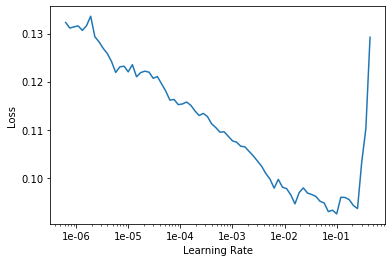

In [53]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [54]:
learn.save('stage-1')

In [56]:
learn.fit_one_cycle(3, slice(1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.121435,0.459844,0.945946,00:25
1,0.122060,0.653205,0.648649,00:25
2,0.290620,0.431128,0.702703,00:25


In [57]:
learn.fit_one_cycle(3, slice(1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.359958,0.401448,0.702703,00:25
1,0.296913,0.211527,0.972973,00:25
2,0.253398,0.155740,0.972973,00:25


In [61]:
learn.load('stage-1');

In [62]:
learn.fit_one_cycle(6, slice(1e-1))

epoch,train_loss,valid_loss,accuracy,time
0,0.108375,0.372794,0.945946,00:25
1,0.092401,10.287236,0.324324,00:24
2,1.418033,0.395949,0.837838,00:25
3,1.069767,1.412513,0.675676,00:24
4,0.940714,0.697992,0.702703,00:24
5,0.828918,0.421867,0.810811,00:25


In [63]:
learn.load('stage-1');

In [64]:
learn.fit_one_cycle(6, slice(1e-01))

epoch,train_loss,valid_loss,accuracy,time
0,0.101875,0.446855,0.837838,00:26
1,0.190976,5.617780,0.216216,00:25
2,0.861578,2.205396,0.648649,00:24
3,0.701188,1.649338,0.729730,00:24
4,0.571635,1.024125,0.756757,00:25
5,0.490970,0.688558,0.783784,00:25


In [65]:
learn.load('stage-1');
learn.fit_one_cycle(6, slice(1e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.131640,0.453771,0.945946,00:25
1,0.101243,0.340084,0.972973,00:25
2,0.172334,0.286169,0.918919,00:25
3,0.146457,0.371702,0.783784,00:26
4,0.137627,0.394046,0.756757,00:25
5,0.146771,0.360849,0.810811,00:25


In [66]:
learn.fit_one_cycle(10, slice(1e-02))

epoch,train_loss,valid_loss,accuracy,time
0,0.150636,0.320533,0.837838,00:25
1,0.124877,0.259602,0.864865,00:25
2,0.103950,0.189767,0.945946,00:25
3,0.094184,0.127338,0.945946,00:24
4,0.091748,0.091161,0.972973,00:25
5,0.087015,0.077821,0.972973,00:25
6,0.085183,0.074390,0.972973,00:25
7,0.081875,0.079051,0.945946,00:25
8,0.075863,0.084299,0.945946,00:25
9,0.080446,0.088672,0.945946,00:24


In [67]:
def find_appropriate_lr(model:Learner, lr_diff:int = 15, loss_threshold:float = .05, adjust_value:float = 1, plot:bool = False) -> float:
    #Run the Learning Rate Finder
    model.lr_find()
    
    #Get loss values and their corresponding gradients, and get lr values
    losses = np.array(model.recorder.losses)
    assert(lr_diff < len(losses))
    loss_grad = np.gradient(losses)
    lrs = model.recorder.lrs
    
    #Search for index in gradients where loss is lowest before the loss spike
    #Initialize right and left idx using the lr_diff as a spacing unit
    #Set the local min lr as -1 to signify if threshold is too low
    r_idx = -1
    l_idx = r_idx - lr_diff
    while (l_idx >= -len(losses)) and (abs(loss_grad[r_idx] - loss_grad[l_idx]) > loss_threshold):
        local_min_lr = lrs[l_idx]
        r_idx -= 1
        l_idx -= 1

    lr_to_use = local_min_lr * adjust_value
    
    if plot:
        # plots the gradients of the losses in respect to the learning rate change
        plt.plot(loss_grad)
        plt.plot(len(losses)+l_idx, loss_grad[l_idx],markersize=10,marker='o',color='red')
        plt.ylabel("Loss")
        plt.xlabel("Index of LRs")
        plt.show()

        plt.plot(np.log10(lrs), losses)
        plt.ylabel("Loss")
        plt.xlabel("Log 10 Transform of Learning Rate")
        loss_coord = np.interp(np.log10(lr_to_use), np.log10(lrs), losses)
        plt.plot(np.log10(lr_to_use), loss_coord, markersize=10,marker='o',color='red')
        plt.show()
        
    return lr_to_use

In [69]:
find_appropriate_lr(learn)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Exception in thread QueueFeederThread:
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\queues.py", line 232, in _feed
    close()
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\connection.py", line 177, in close
    self._close()
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\connection.py", line 277, in _close
    _CloseHandle(self._handle)
OSError: [WinError 6] The handle is invalid

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\ProgramData\Anaconda3\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\ProgramData\Anaconda3\lib\multiprocessing\queues.py", line 263, in _feed
    queue_sem.release()
ValueError: semaphore or lock released too many times



0.09999999999999999

In [70]:
learn.load('stage-1');
learn.fit_one_cycle(16, slice(1e-1))

epoch,train_loss,valid_loss,accuracy,time
0,0.156412,0.512720,0.675676,00:25
1,0.257523,0.261105,1.000000,00:24
2,0.212120,0.211745,0.945946,00:24
3,0.285457,0.523674,0.918919,00:24
4,0.325298,1.505473,0.675676,00:24
5,0.339958,0.844227,0.756757,00:24
6,0.301022,0.618395,0.810811,00:24
7,0.271995,0.294637,0.918919,00:24
8,0.251452,0.432287,0.891892,00:24
9,0.228552,0.428235,0.891892,00:24


#### experiment KNN k-value

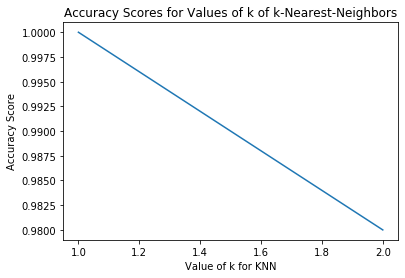

In [80]:
# experimenting with different n values in KNN

k_range = list(range(1,3))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, Y)
    y_pred = knn.predict(X)
    scores.append(knn.score(X, Y))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

# adaBoost

In [85]:
from sklearn.ensemble import AdaBoostClassifier

adaBoost = AdaBoostClassifier(base_estimator=None,
                              learning_rate=1.0,
                              n_estimators=100)
adaBoost.fit(X, Y)
Y_pred = adaBoost.predict(X)
acc_ada = adaBoost.score(X, Y)
acc_ada

0.9733333333333334

# xgBoost

In [130]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV

parameters = {
    'max_depth': [3, 4, 5, 6, 7, 8], 
    'n_estimators': [5, 10, 20, 50, 100],
    'learning_rate': np.linspace(0.02,0.16,8)
}

xgb_model = GridSearchCV(xgb.XGBClassifier(), parameters, cv=5).fit(X, Y)

print(accuracy_score(Y, xgb_model.predict(X)))
print(xgb_model.best_score_)
print(xgb_model.best_params_)
print(xgb_model.best_estimator_)

acc_xgb = round(xgb_model.score(X, Y) * 100, 2)
print(acc_xgb)

0.9733333333333334
0.9666666666666668
{'learning_rate': 0.02, 'max_depth': 3, 'n_estimators': 5}
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=5, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
ended 97.33


# CatBoost

In [132]:
import catboost as cb

parameters = {'iterations': [10, 50, 100],
              'learning_rate': np.linspace(0.02,0.16,4),
              'depth': range(4,10)
}

catb_model = GridSearchCV(cb.CatBoostClassifier(verbose=False), parameters, cv=5).fit(X, Y)

print(accuracy_score(Y, catb_model.predict(X)))
print(catb_model.best_score_)
print(catb_model.best_params_)

acc_catb = round(catb_model.score(X, Y) * 100, 2)
print(acc_catb)

0.9733333333333334
0.9666666666666668
{'depth': 4, 'iterations': 10, 'learning_rate': 0.16}
97.33


# LightGBM

In [133]:
import lightgbm as lgbm

parameters = {'n_estimators': [5, 50, 100],
              'learning_rate': np.linspace(0.02,0.16,4),
              'num_leaves': [31, 61],
              'min_data_in_leaf': [20, 30, 40],
              'max_depth': range(3,8),
}

lgbm_model = GridSearchCV(lgbm.LGBMClassifier(), parameters, cv=5).fit(X, Y)

print(accuracy_score(Y, lgbm_model.predict(X)))
print(lgbm_model.best_score_)
print(lgbm_model.best_params_)
print(lgbm_model.best_estimator_)

acc_lgbm = round(lgbm_model.score(X, Y) * 100, 2)
print(acc_lgbm)

0.98
0.9533333333333334
{'learning_rate': 0.11333333333333334, 'max_depth': 3, 'min_data_in_leaf': 20, 'n_estimators': 50, 'num_leaves': 31}
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.11333333333333334,
               max_depth=3, min_child_samples=20, min_child_weight=0.001,
               min_data_in_leaf=20, min_split_gain=0.0, n_estimators=50,
               n_jobs=-1, num_leaves=31, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)
98.0
